In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.38222111,  0.58249531],
       [ 1.09345461,  0.20251599],
       [-0.34312311,  1.17456742],
       ...,
       [-0.63131693, -0.17729766],
       [ 0.94497904, -1.53250698],
       [ 0.88199999,  1.065189  ]])

In [5]:
y

array([ 6.21996848e+01,  4.86779915e+01,  8.22704850e+01,  1.30669780e+02,
        9.81286943e+00,  3.80397660e+01, -8.22973003e+01,  1.16770251e+02,
       -9.61802424e+01,  1.32274943e+02,  1.73574588e+01,  5.08487523e+01,
        1.56657171e+01, -4.65256902e+01, -2.68000642e+01, -1.39371316e+02,
       -3.76351745e+01,  1.16470337e+02,  9.69539633e+01, -1.03192280e+02,
       -1.13547438e+01,  1.41986205e+01,  3.74352151e+01,  1.39738566e+02,
       -1.20662067e+02,  5.10510168e+01,  1.66976421e+02,  5.05209209e+01,
        1.51125101e+02, -3.85338102e+01, -5.37619366e+01,  4.40505084e+01,
        1.43585767e+02, -5.74275080e+01,  1.13650867e+02,  7.32075249e+01,
        1.30825241e+02, -8.11595143e+00, -5.04099927e+01,  4.52647270e+01,
        4.92585369e+01,  1.18896887e+02, -1.03736446e+02,  7.24228666e+01,
        5.43054473e+01,  1.78259559e+02, -1.54207717e+02,  1.64619676e+02,
       -4.55447361e+01,  1.12168350e+02,  2.77270374e+01, -2.24091150e+01,
       -5.15125872e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.382221
1      1.093455
2     -0.343123
3      0.518404
4      1.667484
         ...   
995    1.302950
996    0.147519
997   -0.631317
998    0.944979
999    0.882000
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

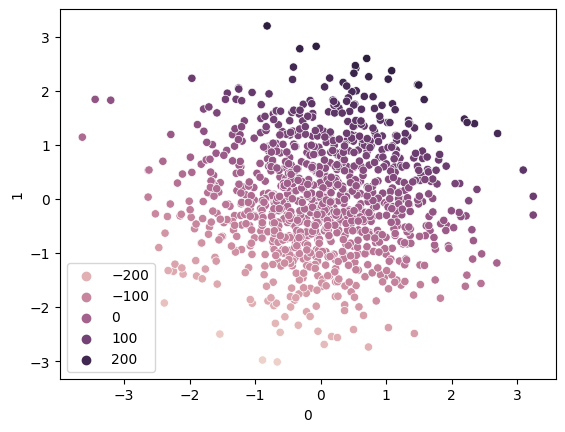

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [10]:
svr.coef_

array([[33.81901135, 83.01051013]])

In [11]:
## Prediction
y_pred=svr.predict(X_test)
y_pred

array([ 1.71395678e+01, -1.14545041e+01,  2.90925662e+01,  3.74886293e+01,
       -2.05573485e+00, -4.35591050e+01,  8.87865338e+01, -4.38847133e+01,
        5.45224263e+01,  1.29892596e+02,  7.25945984e+01,  8.99616543e+01,
       -5.61316366e+01,  3.82867465e+01, -7.59979123e+01, -5.84114739e+01,
       -8.52908868e+01,  8.40255334e+01,  3.97949094e+00, -1.82939653e+01,
        2.34525036e+01, -1.67669764e+01, -5.25631251e+01, -3.07961121e+01,
       -5.13662752e+01, -3.86787495e+01, -7.31246609e+00, -1.83585023e+02,
       -4.09200335e+01, -3.28716629e+01, -8.68073139e+01, -7.14272633e+01,
        7.87058113e+01,  1.51042091e+02, -4.61956983e+01, -6.10628498e+01,
        6.57348415e+01,  7.38853474e+01,  1.97073523e+02, -8.94360566e+01,
        9.86644256e+00,  9.62106819e+01, -4.08677664e+01, -6.27122951e+01,
       -8.55543496e+01,  5.48124100e+01,  7.07979734e+00,  2.87254418e+01,
       -9.46990711e+01,  2.51745207e+01,  4.73577831e+01, -1.21008454e+02,
       -2.40271807e+02,  

In [12]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9987653068043563


## Hyperparametere Tuning With SVR

In [13]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [14]:
grid=GridSearchCV(SVR(),param_grid=param_grid,scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [15]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1844.613 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1707.419 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1731.149 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1750.190 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1810.323 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1844.613 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1707.419 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1731.149 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1750.190 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1810.323 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [16]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [17]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9987591734763692
